In [1]:
import numpy as np
import pandas as pd
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import torch
from scipy import signal

In [2]:
(X,y,position) = torch.load('/work1/s174505/Thesis/Data/Real_data.pt')
position = position.numpy()/1000
labels_y = [
    'Lateral left D1', 'Lateral right D1', 'Vertical left D1', 'Vertical right D1', 
    'Lateral left D2', 'Lateral right D2', 'Vertical left D2', 'Vertical right D2', 
    'Lateral left D3', 'Lateral right D3', 'Vertical left D3', 'Vertical right D3', 
]
    
labels_X = [
    'Velocità [km/h]', 'AccB1Y', 'AccB1Z', 'AccCR1Y', 'AccCR1Z', 'AccB2Y', 'AccB2Z', # 0-6
    'AccCR2Y', 'AccCR2Z', 'AccB3Y', 'AccB3Z', 'AccCR3Y', 'AccCR3Z', 'AccB4Y', # 7-13
    'AccB4Z', 'AccCR4Y', 'AccCR4Z', 'AccB5Y', 'AccB5Z', 'AccCR5Y', 'AccCR5Z', # 14-20
    'AccB6Y', 'AccB6Z', 'AccCR6Y', 'AccCR6Z', 'AccB7Y', 'AccB7Z', 'AccCR7Y', # 21-27
    'AccCR7Z', 'AccB8Y', 'AccB8Z', 'AccCR8Y', 'AccCR8Z', # 28-32
    'AccCSAY', 'AccCSAZ', 'AccCSBY', 'AccCSBZ', # 33-36
    #'AccCR1YS [m/s^2]', 'AccCR1Yf0 [m/s^2]', 'AccCR2YS [m/s^2]', 'AccCR2Yf0 [m/s^2]', 'AccCR3YS [m/s^2]', # 37-41
    #'AccCR3Yf0 [m/s^2]', 'AccCR4YS [m/s^2]', 'AccCR4Yf0 [m/s^2]', 'AccCR5YS [m/s^2]', 'AccCR5Yf0 [m/s^2]', 'AccCR6YS [m/s^2]', 'AccCR6Yf0 [m/s^2]', # 42-48
    #'AccCR7YS [m/s^2]', 'AccCR7Yf0 [m/s^2]', 'AccCR8YS [m/s^2]', 'AccCR8Yf0 [m/s^2]', # 49-52
    #'AccCSAYS [m/s^2]', 'AccCSAYQ [m/s^2]', 'AccCSAYf [m/s^2]', # 43-55
    #'AccCSAZS [m/s^2]', 'AccCSAZQ [m/s^2]', 'AccCSBYS [m/s^2]', 'AccCSBYQ [m/s^2]', 'AccCSBYf [m/s^2]', 'AccCSBZS [m/s^2]', 'AccCSBZQ [m/s^2]', # 56-62
    #'AccCSAZ_Wz [m/s^2]', 'AccCSBZ_Wz [m/s^2]', # 63-64
    'Curvature' # 65
]
misc = [0]
axel_boxes_Y = [1, 5, 9, 13, 17, 21, 25, 29]
axel_boxes_Z = [2, 6, 10, 14, 18, 22, 26, 30]
bogie_Y = [3, 7, 11, 15, 19, 23, 27, 31]
bogie_Z = [4, 8, 12, 16, 20, 24, 28, 32]
carbody_Y = [33, 35]
carbody_Z = [34, 36]

bogie_Y_S = [37, 39, 41, 43, 45, 47, 49, 51]
bogie_Y_f0 = [38, 40, 42, 44, 46, 48, 50, 52]
carbody_Y_S = [53, 58]
carbody_Y_Q = [54, 59]
carbody_Y_f = [55, 60]
carbody_Z_S = [56, 61]
carbody_Z_Q = [57, 62]
carbody_Z_Wz = [63, 64]

fs=2

In [3]:
df_y = pd.DataFrame(y, columns=labels_y)
df_X = pd.DataFrame(X, columns=labels_X)

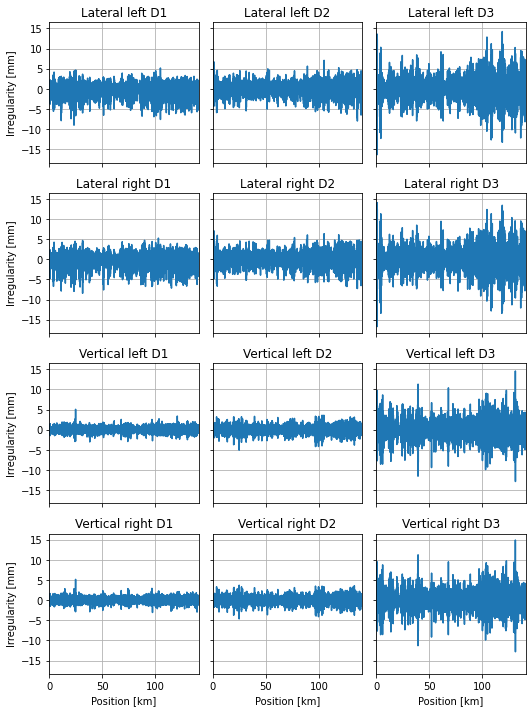

In [4]:
fig, axes = plt.subplots(4,3,figsize=(7.5,10), sharex=True, sharey=True)
axes = axes.T
for i, ax in enumerate(axes.flatten()):
    
    # if i > 1: 
    #    break
    ax.plot(position[::10], y[::10, i])
    ax.set_title(labels_y[i])
    ax.grid()
    if i%4 == 3: ax.set_xlabel('Position [km]')
    if i < 4: ax.set_ylabel('Irregularity [mm]')
ax.set_xlim([position[0],position[-1]])
fig.tight_layout()
fig.savefig('plots/y plots.pdf',format='pdf')

Km                  : NA
Velocità[km/h]      : NA
SSCount [n.]        : NA
Scartamento [mm]    : 1
ScartMedio [mm]     : 2
Curvatura [1/m]     : 3
Sopraelev. [mm]     : 4
VarSopraelev. [mm]  : 5
ScartStdDev [mm]    : 6
Dif.Sopraelev. [mm] : NA
ScartLivTrasv [mm]  : 7
LivTrasvStdDev [mm] : 8
Sghembo3m [°/oo]    : 9
Sghembo9m [°/oo]    : 10
LivLongSxD1 [mm]    : 11
LivLongDxD1 [mm]    : 12
AllinSxD1 [mm]      : 13
AllinDxD1 [mm]      : 14
LivLongSx10m [mm]   : NA
LivLongDx10m [mm]   : NA
AllinSx10m [mm]     : NA
AllinDx10m [mm]     : NA
AllinSxPkPk [mm]    : NA
AllinDxPkPk [mm]    : 15
AllinStdDev [mm]    : 16
LivLongStdDev [mm]  : 17
LivLongSxD2 [mm]    : 18
LivLongDxD2 [mm]    : 19
AllinSxD2 [mm]      : 20
AllinDxD2 [mm]      : 21
LivLongSxD3 [mm]    : 22
LivLongDxD3 [mm]    : 23
AllinSxD3 [mm]      : 24
AllinDxD3 [mm]      : 25

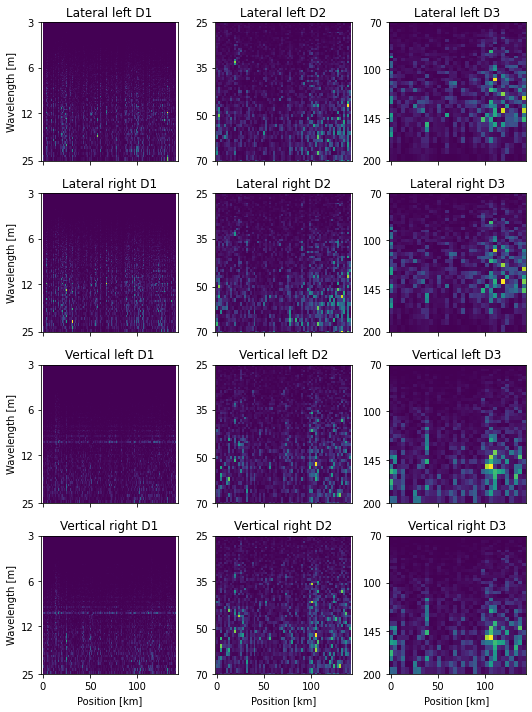

In [25]:
fig, axes = plt.subplots(4,3,figsize=(7.5,10), sharex=True)#, sharey="row")
axes = axes.T
for i, ax in enumerate(axes.flatten()):

    ax.set_yscale("log")
    if i < 4:
        f, t, Sxx = signal.spectrogram(y[:, i], fs, nperseg=1024, noverlap=0)
    elif i < 8:
        f, t, Sxx = signal.spectrogram(y[:, i], fs, nperseg=4096, noverlap=0)
    else:
        f, t, Sxx = signal.spectrogram(y[:, i], fs, nperseg=8192, noverlap=0)

    pos = np.linspace(0, position.max(), len(t))
    ax.pcolormesh(pos, f, Sxx)
    if i < 4: ax.set_ylabel('Wavelength [m]')
    if i%4 == 3: ax.set_xlabel('Position [km]')
    ax.set_title(labels_y[i])
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        which='minor',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False) # labels along the bottom edge are off
    if i < 4:
        ax.set_ylim([1/25, 1/3])
        ax.set_yticks([1/25, 1/12, 1/6, 1/3])
        ax.set_yticklabels([str(25), str(12), str(6), str(3)])
    elif i < 8:
        ax.set_ylim([1/70, 1/25])
        ax.set_yticks([1/70, 1/50, 1/35, 1/25])
        ax.set_yticklabels([str(70), str(50), str(35), str(25)])
    else:
        ax.set_ylim([1/200, 1/70])
        ax.set_yticks([1/200, 1/145, 1/100, 1/70])
        ax.set_yticklabels([str(200), str(145), str(100), str(70)])
fig.tight_layout()

fig.savefig('plots/y spectograms.png',format='png',dpi=250)


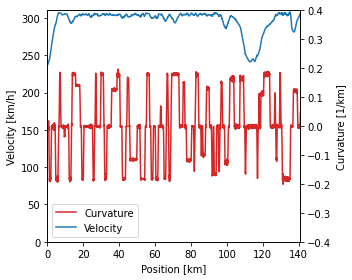

In [37]:
fig, ax = plt.subplots(1,1,figsize=(5,4))

ln1 = ax.plot(position[::10], X[::10,0], label="Velocity", color=plt.cm.tab10(0))
ax.set_ylim([0,310])
ax.set_xlim([position[0], position[-1]])
ax.set_ylabel('Velocity [km/h]')
ax.set_xlabel('Position [km]')

ax2 = ax.twinx()
ln2 = ax2.plot(position[::10], X[::10,-1]*1000, color=plt.cm.tab10(3), label="Curvature")
ax2.set_ylabel('Curvature [1/km]')
ax2.set_ylim([-0.4, 0.4])

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines2 + lines, labels2 + labels, loc=3)
# ax.set_title('')

fig.tight_layout()

fig.savefig('plots/Velocity and curvature.pdf', format='pdf')

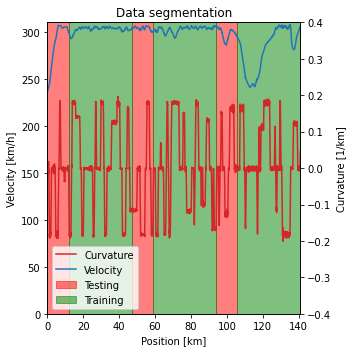

In [36]:
fig, ax = plt.subplots(1,1,figsize=(5,4))

ln1 = ax.plot(position[::10], X[::10,0], label="Velocity", color=plt.cm.tab10(0))
ax.set_ylim([0,310])
ax.set_xlim([position[0], position[-1]])
ax.set_ylabel('Velocity [km/h]')
ax.set_xlabel('Position [km]')

ax2 = ax.twinx()
ln2 = ax2.plot(position[::10], X[::10,-1]*1000, color=plt.cm.tab10(3), label="Curvature")
ax2.set_ylabel('Curvature [1/km]')
ax2.set_ylim([-0.4, 0.4])

ln3 = ax.axvspan(position[1-1], position[23827-1], alpha=0.5, color='red', label='Testing')
ax.axvspan(position[94000-1], position[117827-1], alpha=0.5, color='red')
ax.axvspan(position[188000-1], position[211827-1], alpha=0.5, color='red')
ln4 = ax.axvspan(position[24000-1], position[94000-1], alpha=0.5, color='green', label='Training')
ax.axvspan(position[118000-1], position[188000-1], alpha=0.5, color='green')
ax.axvspan(position[211827-1], position[281827-1], alpha=0.5, color='green')

#lns = 
#labels = [l.get_label() for l in lns]
# ax.legend(lns, labels, loc=0)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines2 + lines, labels2 + labels, loc=3)
ax.set_title('Data segmentation')

fig.tight_layout()

fig.savefig('plots/Data segmentation.pdf', format='pdf')

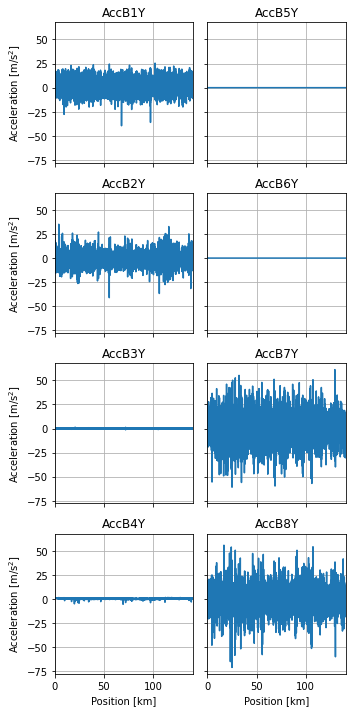

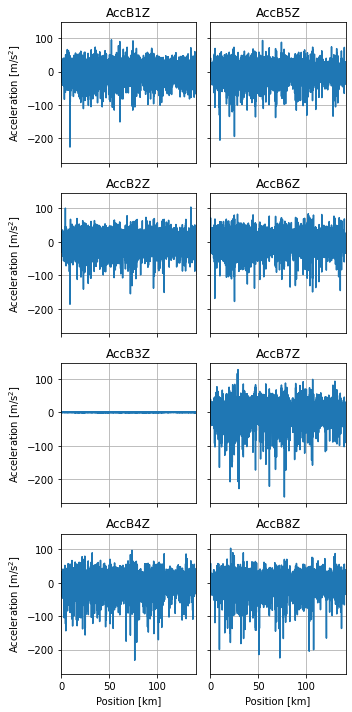

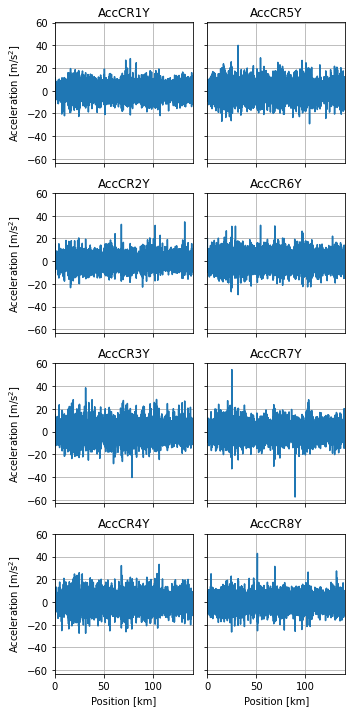

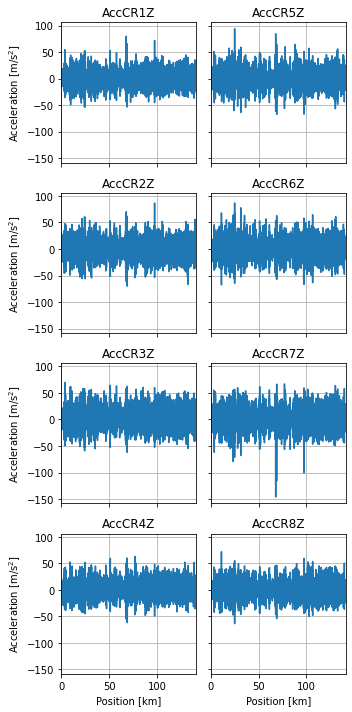

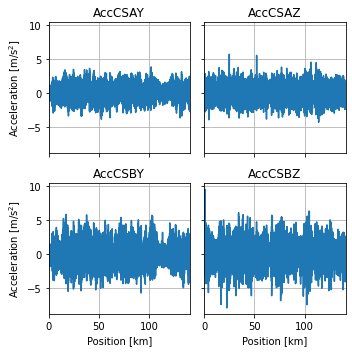

In [22]:
#axel_boxes_Y = [1, 5, 9, 13, 17, 21, 25, 29]
#axel_boxes_Z = [2, 6, 10, 14, 18, 22, 26, 30]
#bogie_Y = [3, 7, 11, 15, 19, 23, 27, 31]
#bogie_Z = [4, 8, 12, 16, 20, 24, 28, 32]
#carbody_Y = [33, 35]
#carbody_Z = [34, 36]


def make_figure(data, filename):
    n_rows = 4
    n_cols = 2
    if len(data) == 4:
        n_rows = 2
    
    fig, axes = plt.subplots(n_rows,n_cols,figsize=(2.5*n_cols,2.5*n_rows), sharex=True, sharey=True)
    axes = axes.T
    for idx,(i,ax) in enumerate(zip(data, axes.flatten())):
        ax.plot(position[::5], X[::5, i])
        if idx%n_rows == (n_rows-1): 
            ax.set_xlabel('Position [km]')
            ax.set_xlim([position[0], position[-1]])
        if idx < n_rows: 
            ax.set_ylabel('Acceleration [m/s$^2$]')
        ax.set_title(labels_X[i])
        ax.grid()
    fig.tight_layout()
    fig.savefig("plots/"+filename+".pdf",format='pdf')

    return fig

data_idxs = [axel_boxes_Y, axel_boxes_Z, bogie_Y, bogie_Z, carbody_Y + carbody_Z]
filenames = [
    "Axel boxes acc. in Y dimension",
    "Axel boxes acc. in Z dimension",
    "Bogie acc. in Y dimension",
    "Bogie acc. in Z dimension",
    "Carbody acc. in Y-Z dimension"
]

for data, filename in zip(data_idxs, filenames):
    make_figure(data, filename)

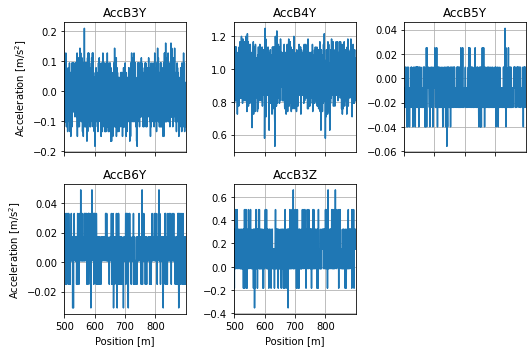

In [28]:
fig, axes = plt.subplots(2,3,figsize=(7.5,5), sharex=True, sharey=False)

for idx,(i,ax) in enumerate(zip([9, 13, 17, 21, 10, -1], axes.flatten())):
    if idx == 5: 
        ax.axis('off')
    else:
        ax.plot(position[1000:1800]*1000, X[1000:1800, i])
        if idx >= 3: ax.set_xlabel('Position [m]')
        ax.set_xlim([position[1000]*1000, position[1800]*1000])
        if idx%3 == 0: ax.set_ylabel('Acceleration [m/s$^2$]')
        ax.set_title(labels_X[i])
        #ax.set_ylim([-0.2,0.15])
        ax.grid()
fig.tight_layout()
fig.savefig('plots/Faulty sensors.pdf',format='pdf')

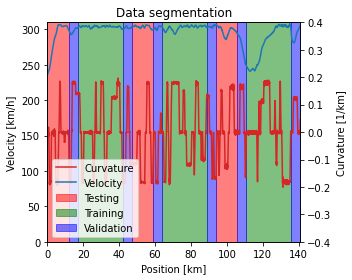

In [38]:
fig, ax = plt.subplots(1,1,figsize=(5,4))

ln1 = ax.plot(position[::10], X[::10,0], label="Velocity", color=plt.cm.tab10(0))
ax.set_ylim([0,310])
ax.set_xlim([position[0], position[-1]])
ax.set_ylabel('Velocity [km/h]')
ax.set_xlabel('Position [km]')

ax2 = ax.twinx()
ln2 = ax2.plot(position[::10], X[::10,-1]*1000, color=plt.cm.tab10(3), label="Curvature")
ax2.set_ylabel('Curvature [1/km]')
ax2.set_ylim([-0.4, 0.4])

ln3 = ax.axvspan(position[1-1], position[23827-1], alpha=0.5, color='red', label='Testing')
ax.axvspan(position[94000-1], position[117827-1], alpha=0.5, color='red')
ax.axvspan(position[188000-1], position[211827-1], alpha=0.5, color='red')
ln4 = ax.axvspan(position[33827-1], position[84000-1], alpha=0.5, color='green', label='Training')
ax.axvspan(position[127827-1], position[178000-1], alpha=0.5, color='green')
ax.axvspan(position[221827-1], position[271827-1], alpha=0.5, color='green')
ln5 = ax.axvspan(position[23827-1], position[33827-1], alpha=0.5, color='blue', label='Validation')
ax.axvspan(position[84000-1], position[94000-1], alpha=0.5, color='blue')
ax.axvspan(position[117827-1], position[127827-1], alpha=0.5, color='blue')
ax.axvspan(position[178000-1], position[188000-1], alpha=0.5, color='blue')
ax.axvspan(position[211827-1], position[221827-1], alpha=0.5, color='blue')
ax.axvspan(position[271827-1], position[281827-1], alpha=0.5, color='blue')

#lns = 
#labels = [l.get_label() for l in lns]
# ax.legend(lns, labels, loc=0)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines2 + lines, labels2 + labels, loc=3)
ax.set_title('Data segmentation')

fig.tight_layout()

fig.savefig('plots/Data segmentation with validation.pdf', format='pdf')

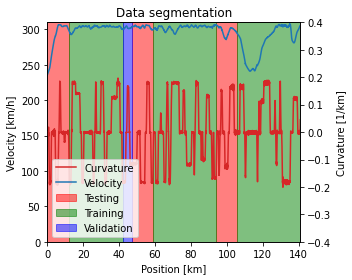

In [39]:
fig, ax = plt.subplots(1,1,figsize=(5,4))

ln1 = ax.plot(position[::10], X[::10,0], label="Velocity", color=plt.cm.tab10(0))
ax.set_ylim([0,310])
ax.set_xlim([position[0], position[-1]])
ax.set_ylabel('Velocity [km/h]')
ax.set_xlabel('Position [km]')

ax2 = ax.twinx()
ln2 = ax2.plot(position[::10], X[::10,-1]*1000, color=plt.cm.tab10(3), label="Curvature")
ax2.set_ylabel('Curvature [1/km]')
ax2.set_ylim([-0.4, 0.4])

ln3 = ax.axvspan(position[1-1], position[23827-1], alpha=0.5, color='red', label='Testing')
ax.axvspan(position[94000-1], position[117827-1], alpha=0.5, color='red')
ax.axvspan(position[188000-1], position[211827-1], alpha=0.5, color='red')
ln4 = ax.axvspan(position[23827-1], position[84000-1], alpha=0.5, color='green', label='Training')
ax.axvspan(position[117827-1], position[188000-1], alpha=0.5, color='green')
ax.axvspan(position[211827-1], position[281827-1], alpha=0.5, color='green')
ln5 = ax.axvspan(position[84000-1], position[94000-1], alpha=0.5, color='blue', label='Validation')

#lns = 
#labels = [l.get_label() for l in lns]
# ax.legend(lns, labels, loc=0)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines2 + lines, labels2 + labels, loc=3)
ax.set_title('Data segmentation')

fig.tight_layout()

fig.savefig('plots/Data segmentation with validation2.pdf', format='pdf')

In [25]:
axel_boxes_Z

[2, 6, 10, 14, 18, 22, 26, 30]

In [62]:
df_X_mean = df_X.rolling(10).mean()

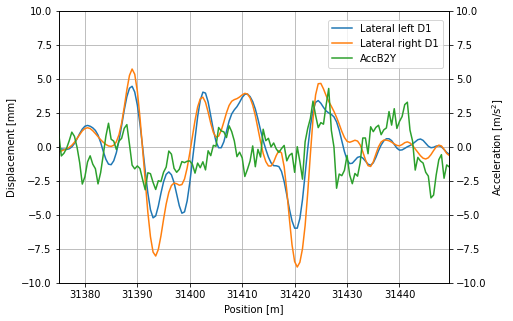

In [93]:
fig, ax = plt.subplots(1,1,figsize=(7,5))

start_idx = 62750
end_idx = 62900

X_idx_1 = 5
X_idx_2 = 36

ax.plot(position[start_idx:end_idx]*1000, y[start_idx:end_idx,0], label=labels_y[0])
ax.plot(position[start_idx:end_idx]*1000, y[start_idx:end_idx,1], label=labels_y[1])
ax.set_ylim([-10, 10])
ax.set_ylabel("Displacement [mm]")

ax2 = ax.twinx()
ax2.plot(position[start_idx:end_idx]*1000, df_X_mean.iloc[start_idx:end_idx,X_idx_1], label=labels_X[X_idx_1], color=plt.cm.tab10(2))
#ax2.plot(position[start_idx:end_idx]*1000, X[start_idx:end_idx,X_idx_2], label=labels_X[X_idx_2], color=plt.cm.tab10(3))
ax2.set_ylim([-10, 10])
ax2.set_ylabel("Acceleration [m/s$^2$]")

ax.grid()
ax.set_xlim([position[start_idx]*1000, position[end_idx-1]*1000])
ax.set_xlabel("Position [m]")

fig.legend(bbox_to_anchor=(0.65,0.87), loc="upper left")

fig.savefig("plots/Data example.pdf",format="pdf", bbox_inches="tight")